# [PY-09E] Apple Inc. stock prices

## Introduction

This example shows how to carry out an exploratory statistical analysis with Pandas tools. It uses data on the Apple Inc. stock prices in the Nasdaq stock market, for the year 2022, as published by Yahoo Finance (`finance.yahoo.com/quote/AAPL/history?p=AAPL`). The data source is the file `aapl.csv`, which covers 251 trading days. The data come in the typical OHLC format (Open/High/Low/Close).

## The data set

The columns of the source file are:

* `date`, the date, as 'yyyy-mm-dd'.

* `open`, the price (US dollars) of the stock at the beginning of the trading day. It can be different from the closing price of the previous trading day.

* `high`, the highest price (US dollars) of the stock on that trading day.

* `low`, the lowest price (US dollars) of the stock on that day.

* `close`, the price (US dollars) of the stock at closing time.

* `adj_close`, the closing price adjusted for factors in corporate actions, such as stock splits, dividends, and rights offerings.

* `volume`, the amount of Apple stock (number of shares) that has been traded on that day.

## Questions

Q1. Extract the data for the trading days previous to January 15th as a separate data frame.

Q2. Use a **line plot** to see whether there is a **time trend** in the opening price.

Q3. Use a line plot and a **histogram** to visualize the trading volume. What do you conclude?

Q4. A direct measure of **volatility** can be obtained as the difference of the highest price minus the lowest price in a given trading day. This is called the **daily price variation**. Add the daily variation of the Apple stock prices as a new column. Do you see a trend in the daily price variation? How is the distribution?

Q5. Is there an **association** between the daily price variation and the trading volume? Is the volatility stronger the days in which more shares are traded?

## Importing the data

We import Pandas in the usual way:

In [1]:
import pandas as pd

Let us suppose, for this example, that the source file is in our computer. To import the data with the function `read_csv()`, we have to specify where to find it. By default, it will be searched in the **working directory**. Assuming that it is in the folder `py_course` of the working directory. We can then use the **relative path** `py_course/aapl.csv` to locate the file.

In [2]:
df = pd.read_csv('py_course/aapl.csv')

This creates the data frame `df`. If the file is located somewhere else, you have to edit the path to fit the current location of the file. If you don't have file in your computer the above command yields an error. You can also load the file from github. You will need an internet connection, and it will not be as fast as having it in the local drive.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/D-G-D/Python/refs/heads/main/Data/aapl.csv')

## Exploring the data

Since nothing has been specified about the index, a `RangeIndex` has been assigned. The report printed by the method `info()` is probably the best weay to start exploring this data frame.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       251 non-null    object 
 1   open       251 non-null    float64
 2   high       251 non-null    float64
 3   low        251 non-null    float64
 4   close      251 non-null    float64
 5   adj_close  251 non-null    float64
 6   volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


The dimensions and the column names are what we expected. Since there are 251 entries in the index and 251 non-null entries in every column, there are no missing values. The distinction between `int` and `float` columns is not relevant for a statistical description, so don't pay attention. The column `date` has been read by `.read_csv()` as type `str` (reporting it as `object` does change this fact). 

We can take a look at the first rows with the method `.head()`. Nothing unexpected here.

In [5]:
df.head()

,date,open,high,low,close,adj_close,volume
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,180.683884,104487900
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,178.390701,99310400
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,173.645538,94537600
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,170.746796,96904000
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,170.915573,86709100


A statistical summary can be extracted with the method `.describe()`. Note that the column `date`, which is not numeric, is omitted.

In [6]:
df.describe()

,open,high,low,close,adj_close,volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,154.802709,156.907809,152.691315,154.835060,154.146562,8.791038e+07
std,13.063034,12.937389,13.108058,13.056081,12.825977,2.365699e+07
min,127.989998,129.949997,125.870003,126.040001,125.847855,3.519590e+07
25%,144.330002,146.709999,142.324997,144.645004,144.239502,7.229740e+07
50%,154.009995,155.830002,151.940002,154.089996,153.387222,8.373720e+07
75%,166.189995,167.989998,164.044998,165.915001,165.019608,9.693705e+07
max,182.630005,182.940002,179.119995,182.009995,180.683884,1.826020e+08


## Q1. Data previous to January 15th

For this type of data, we frequently filter by the date, selecting the period desired. Let us consider the expression `df['date'] < '2022-01-15'`. The Python kernel will evaluate it for every term of the column `date`, returning a Boolean mask. Using this mask as a filter, we get the requested data subset.

In [7]:
df[df['date'] < '2022-01-15']

,date,open,high,low,close,adj_close,volume
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,180.683884,104487900
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,178.390701,99310400
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,173.645538,94537600
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,170.746796,96904000
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,170.915573,86709100
5,2022-01-10,169.080002,172.500000,168.169998,172.190002,170.935425,106765600
6,2022-01-11,172.320007,175.179993,170.820007,175.080002,173.804367,76138300
7,2022-01-12,176.119995,177.179993,174.820007,175.529999,174.251083,74805200
8,2022-01-13,175.779999,176.619995,171.789993,172.190002,170.935425,84505800
9,2022-01-14,171.339996,173.779999,171.089996,173.070007,171.809036,80440800


## Q2. Line plot for the opening price

Analysts typically explore trends in stock prices. Let us do that with opening price. The corresponding column is extracted as the series `df['open']`. The method `.plot()` returns a line plot. The parameters `figsize` and `color` have already appeared in the lecture PY-07. Though `linewidth=1` is a default argument, it has been explicitly included to call your attention. Note that it is possible to get a line plot in Pandas  directly, skipping the Matpotlib pyplot API. 

<Axes: title={'center': 'Figure 1. Opening price'}>

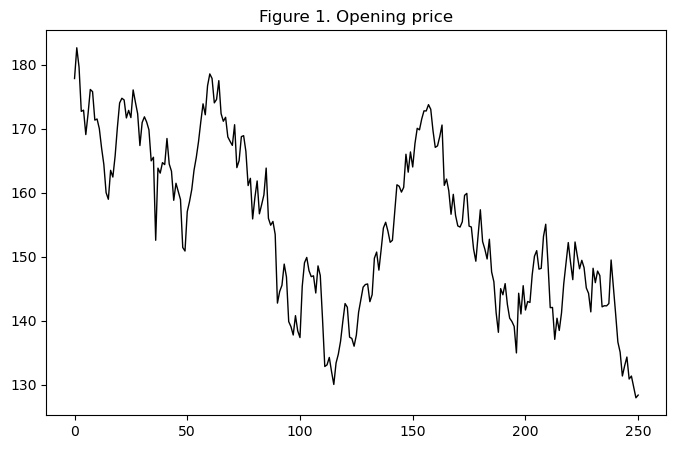

In [8]:
df['open'].plot(figsize=(8,5), title='Figure 1. Opening price', color='black', linewidth=1)

In this case, the line plot does not show an obvious upwards trend, but a sequence of short trends, up and down.

## Q3. Line plot and histogram for the trading volume

The numbers for the trading volume are high, since it comes as a number of shares. In such cases, rescaling can improve the picture. Here, we express the volume in millions of share

In [9]:
df['volume'] = df['volume']/10**6

A line plot can be obtained just as for the opening price.

<Axes: title={'center': 'Figure 2. Trading volume'}>

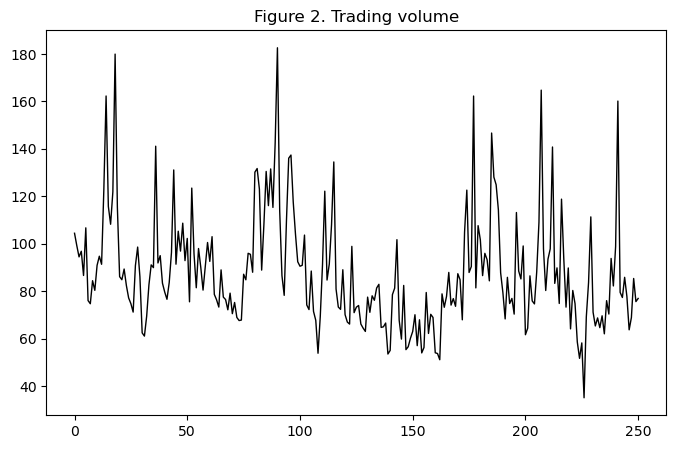

In [10]:
df['volume'].plot(figsize=(8,5), title='Figure 2. Trading volume', color='black', linewidth=1)

No clear trends here. The trading volume looks quite **stationary**. It may make sense to look at the distribution of the daily volumes, as if they were extracted from a "population". The histogram is a quick and dirty graphical tool for this job. In Pandas, the method `.plot.hist()` returns a histogram. The argument `edgecolor='white'` improves the picture (you may disagree), delineating the border of the histogram bars.

<Axes: title={'center': 'Figure 3. Trading volume (alternative visualization)'}, xlabel='Trading volume (1000 shares)', ylabel='Frequency'>

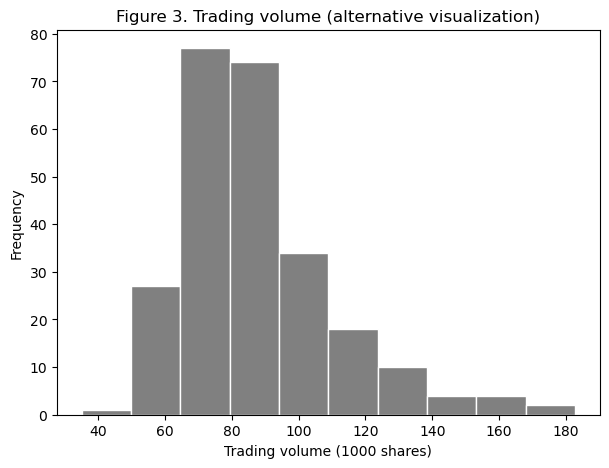

In [11]:
df['volume'].plot.hist(figsize=(7,5),
                       title='Figure 3. Trading volume (alternative visualization)',
                       color='gray', edgecolor='white', xlabel='Trading volume (1000 shares)')

We don't see here the bell-shaped profile of the statisticians' beloved model, the **normal distribution**, but that of a **skewed distribution**. This type of distribution, with a well-defined **right tail**, is typical of variables whose values are amounts of money.

## Q4. Trend and distribution for the daily price variation

We could calculate the daily price variation and keep it as a separate series, or add it as a new column to the current data frame `df`. We choose here the second option.

In [12]:
df['dvar'] = df['high'] - df['low']

When  displaying the heading rows of the new data frame, we see the new column on the right side.

In [13]:
df.head()

,date,open,high,low,close,adj_close,volume,dvar
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,180.683884,104.4879,5.169998
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,178.390701,99.3104,3.820007
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,173.645538,94.5376,5.529999
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,170.746796,96.9040,3.660004
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,170.915573,86.7091,3.110001


Now, the line plot and the histogram are obtained as for the trading volume. They are similar.

<Axes: title={'center': 'Figure 4. Daily price variation'}>

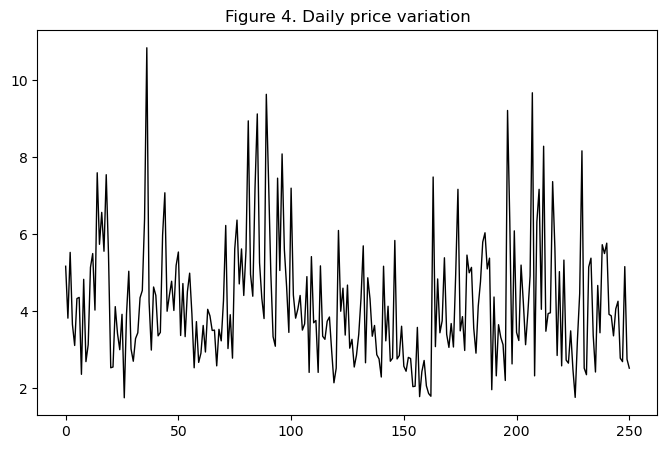

In [14]:
df['dvar'].plot(figsize=(8,5), title='Figure 4. Daily price variation',
                color='black', linewidth=1)

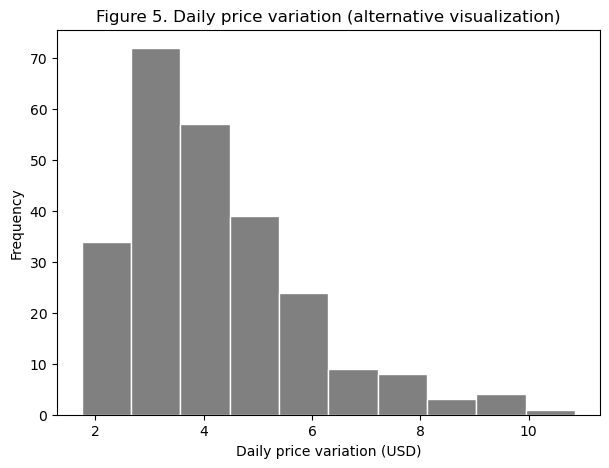

In [15]:
df['dvar'].plot.hist(figsize=(7,5),
    title='Figure 5. Daily price variation (alternative visualization)',
    color='gray', edgecolor='white', xlabel='Daily price variation (USD)');

## Q5. Association between daily price variation and trading volume

Common wisdom tells us that price will show more intraday variation the days in which there is more trading activity, and less intraday variation with low activity. Comparing line plots may gives us an idea of this type of association, but is better to put together the two series in a **scatter plot**. We can get a scatter plot in Pandas with the method `.plot.scatter()`.

<Axes: title={'center': 'Figure 6. Daily variation vs volume'}, xlabel='Trading volume (1000 shares)', ylabel='Daily price variation (USD)'>

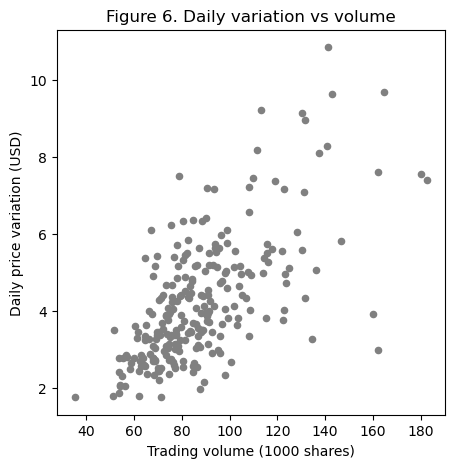

In [16]:
df.plot.scatter(x='volume', y='dvar',
                title='Figure 6. Daily variation vs volume', figsize=(5,5), color='gray',
                xlabel='Trading volume (1000 shares)', ylabel='Daily price variation (USD)')

The scatter plot somewhat confirms our guess of a positive association between the trading volume and the daily variation, though the interpretation of plots is always subjective. To be objective, statisticians use the correlation to evaluate the strength of the association. More specifically, it tells us the extent to which one series can be represented as a linear expression of the other series. The correlation can be positive or negative. A strong correlation is one which is close to 1 (or -1), and a weak correlation one which is close to 0. In Pandas, correlations can be calculated with the method `.corr()`.

In [17]:
df['volume'].corr(df['dvar'])

0.6461533889925509

This correlation is relevant, and confirms our guess. You may wonder why do you need so many decimals for a correlation. Indeed, correlations are better expressed with two (maybe three) decimals. You can get this with method `.round()`.

In [18]:
df['volume'].corr(df['dvar']).round(2)

0.65